In [42]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Snowflake Connection
conn = snowflake.connector.connect(
    user="NEPHTHYS",
    password="Funcat1314",
    account="jub37779.us-east-1",
    warehouse="COMPUTE_WH",
    database="INSTACART_DB",
    schema="CLEAN"
)

# Create a cursor object
cur = conn.cursor()

In [ ]:
1. Comportamiento de compra según día de la semana

/tmp/ipykernel_28442/1846622355.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ORDER_DOW", y="ORDER_COUNT", data=df, palette="viridis")


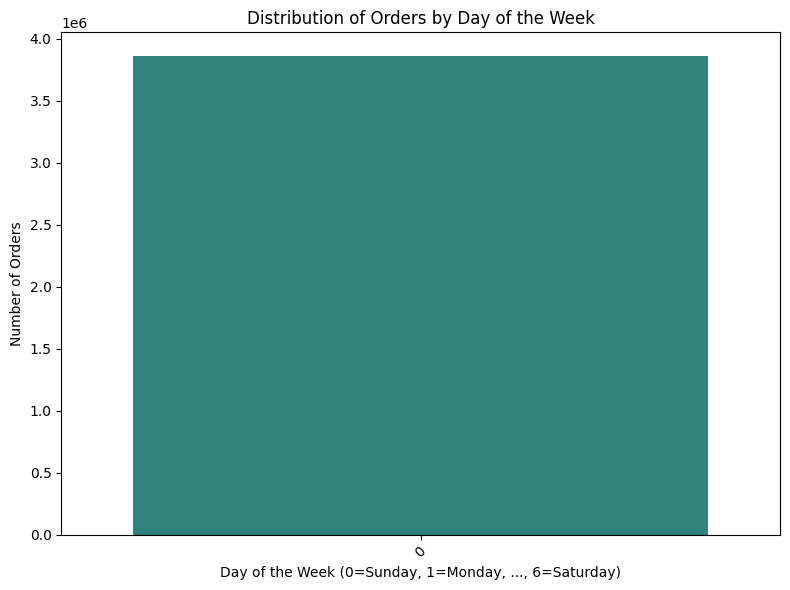

In [43]:
# Query to get the distribution of orders by day of the week
query = """
    SELECT ORDER_DOW, COUNT(*) AS ORDER_COUNT
    FROM INSTACART_DB.CLEAN.FACT_ORDERS
    GROUP BY ORDER_DOW
    ORDER BY ORDER_DOW;
"""

# Execute the query and fetch the results
cur.execute(query)
data = cur.fetchall()

# Convert the results into a DataFrame
df = pd.DataFrame(data, columns=["ORDER_DOW", "ORDER_COUNT"])

# Plotting the distribution of orders by day of the week
plt.figure(figsize=(8, 6))
sns.barplot(x="ORDER_DOW", y="ORDER_COUNT", data=df, palette="viridis")

# Customize the plot
plt.title("Distribution of Orders by Day of the Week")
plt.xlabel("Day of the Week (0=Sunday, 1=Monday, ..., 6=Saturday)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
2. Comportamiento de compra según hora del día

/tmp/ipykernel_28442/1019352941.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ORDER_HOUR_OF_DAY", y="ORDER_COUNT", data=df, palette="viridis")


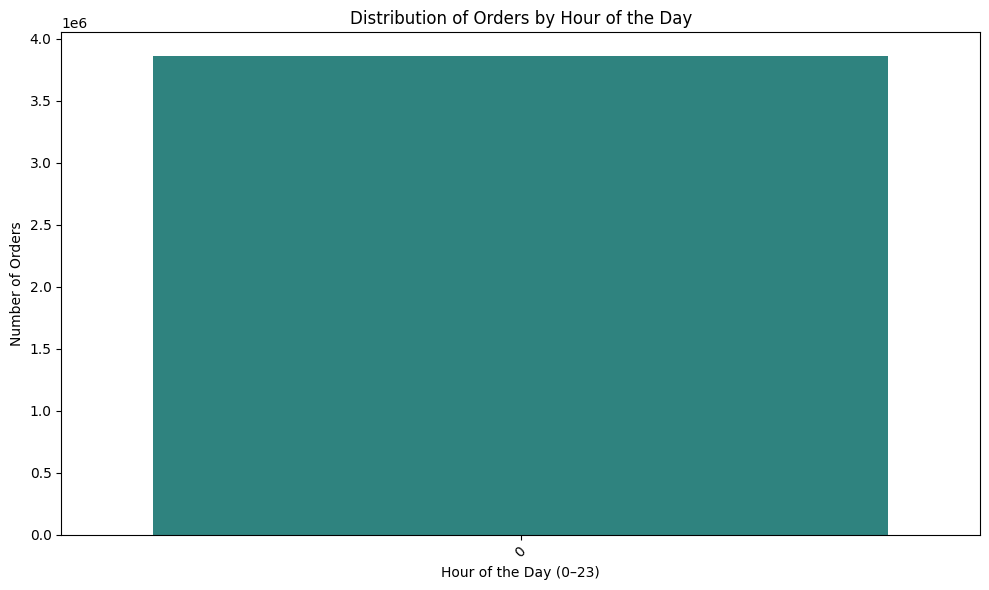

In [44]:
# Query to get the distribution of orders by hour of the day
query = """
    SELECT ORDER_HOUR_OF_DAY, COUNT(*) AS ORDER_COUNT
    FROM INSTACART_DB.CLEAN.FACT_ORDERS
    GROUP BY ORDER_HOUR_OF_DAY
    ORDER BY ORDER_HOUR_OF_DAY;
"""

# Execute the query and fetch the results
cur.execute(query)
data = cur.fetchall()

# Convert the results into a DataFrame
df = pd.DataFrame(data, columns=["ORDER_HOUR_OF_DAY", "ORDER_COUNT"])

# Plotting the distribution of orders by hour of the day
plt.figure(figsize=(10, 6))
sns.barplot(x="ORDER_HOUR_OF_DAY", y="ORDER_COUNT", data=df, palette="viridis")

# Customize the plot
plt.title("Distribution of Orders by Hour of the Day")
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
3. Comportamiento según hora del día y día de la semana

In [45]:
# Query to get the distribution of orders by day of the week and hour of the day
query = """
    SELECT ORDER_DOW, ORDER_HOUR_OF_DAY, COUNT(*) AS ORDER_COUNT
    FROM INSTACART_DB.CLEAN.FACT_ORDERS
    GROUP BY ORDER_DOW, ORDER_HOUR_OF_DAY
    ORDER BY ORDER_DOW, ORDER_HOUR_OF_DAY;
"""

# Execute the query and fetch the results
cur.execute(query)
data = cur.fetchall()

# Convert the results into a DataFrame
df = pd.DataFrame(data, columns=["ORDER_DOW", "ORDER_HOUR_OF_DAY", "ORDER_COUNT"])

# Pivot the table for heatmap
df_pivot = df.pivot("ORDER_DOW", "ORDER_HOUR_OF_DAY", "ORDER_COUNT")

# Plotting the heatmap for day of the week vs hour of the day
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap="viridis", annot=True, fmt="d", linewidths=0.5)

# Customize the plot
plt.title("Order Frequency by Day of the Week and Hour of the Day")
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Day of the Week (0=Sunday, 6=Saturday)")
plt.tight_layout()

# Show the plot
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [ ]:
4. Distribución de las órdenes hechas por los clientes

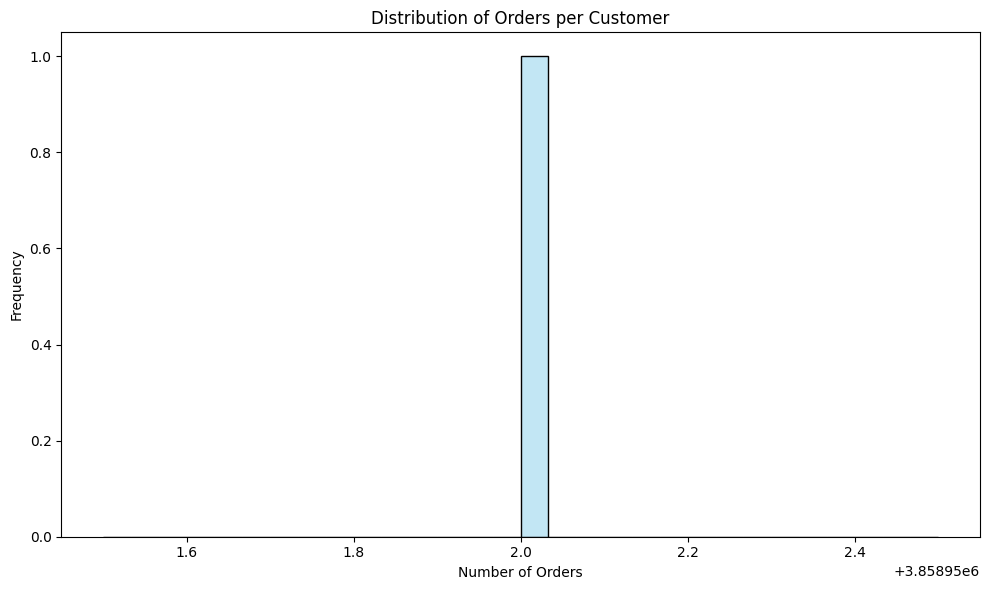

Average number of orders per customer: 3858952.0


In [50]:
# Query to get the number of orders per customer
query = """
    SELECT USER_ID, COUNT(*) AS ORDER_COUNT
    FROM INSTACART_DB.CLEAN.FACT_ORDERS
    GROUP BY USER_ID
    ORDER BY ORDER_COUNT DESC;
"""

# Execute the query and fetch the results
cur.execute(query)
data = cur.fetchall()

# Convert the results into a DataFrame
df = pd.DataFrame(data, columns=["USER_ID", "ORDER_COUNT"])

# Plotting the distribution of orders per customer
plt.figure(figsize=(10, 6))
sns.histplot(df['ORDER_COUNT'], bins=30, kde=True, color='skyblue')

# Customize the plot
plt.title("Distribution of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Frequency")
plt.tight_layout()

# Show the plot
plt.show()

# Calculate the average number of orders per customer
average_orders = df["ORDER_COUNT"].mean()
print(f"Average number of orders per customer: {average_orders}")


In [ ]:
5. Top 20 productos más frecuentes

/tmp/ipykernel_28442/3461646744.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PRODUCT_NAME", y="PRODUCT_COUNT", data=df, palette="viridis")


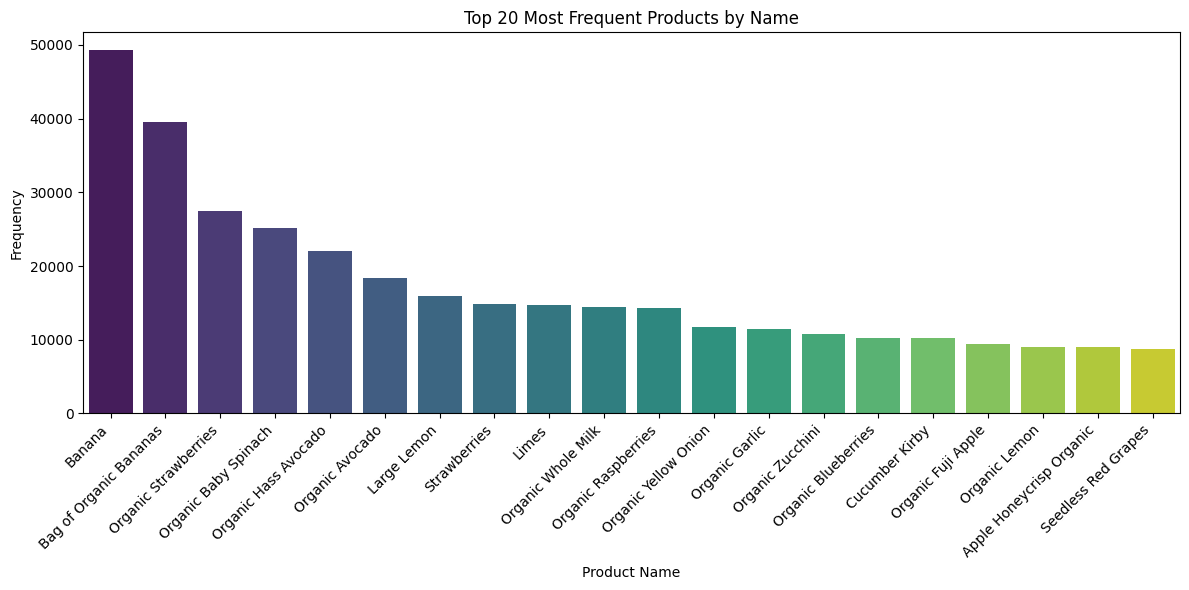

In [49]:
# Query to get the top 20 most frequent products by name
query = """
    SELECT dp.PRODUCT_NAME, COUNT(*) AS PRODUCT_COUNT
    FROM INSTACART_DB.CLEAN.FACT_ORDERS fo
    JOIN INSTACART_DB.CLEAN.DIM_PRODUCTS dp ON fo.PRODUCT_ID = dp.PRODUCT_ID
    GROUP BY dp.PRODUCT_NAME
    ORDER BY PRODUCT_COUNT DESC
    LIMIT 20;
"""

# Execute the query and fetch the results
cur.execute(query)
data = cur.fetchall()

# Convert the results into a DataFrame
df = pd.DataFrame(data, columns=["PRODUCT_NAME", "PRODUCT_COUNT"])

# Plotting the top 20 most frequent products by name
plt.figure(figsize=(12, 6))
sns.barplot(x="PRODUCT_NAME", y="PRODUCT_COUNT", data=df, palette="viridis")

# Customize the plot
plt.title("Top 20 Most Frequent Products by Name")
plt.xlabel("Product Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate product names for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
6. ¿Cuántos artículos se compran generalmente en un pedido?

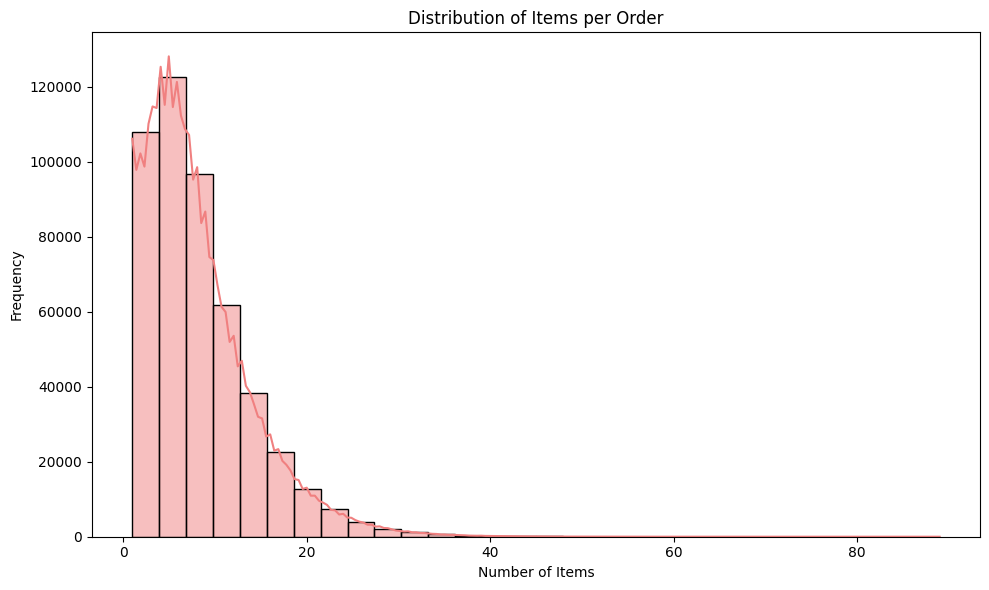

In [51]:
# Query to get the number of items per order
query = """
    SELECT ORDER_ID, COUNT(*) AS ITEM_COUNT
    FROM INSTACART_DB.CLEAN.FACT_ORDERS
    GROUP BY ORDER_ID;
"""

# Execute the query and fetch the results
cur.execute(query)
data = cur.fetchall()

# Convert the results into a DataFrame
df = pd.DataFrame(data, columns=["ORDER_ID", "ITEM_COUNT"])

# Plotting the distribution of items per order
plt.figure(figsize=(10, 6))
sns.histplot(df['ITEM_COUNT'], bins=30, kde=True, color='lightcoral')

# Customize the plot
plt.title("Distribution of Items per Order")
plt.xlabel("Number of Items")
plt.ylabel("Frequency")
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
7. Top 20 artículos que se vuelven a pedir con más frecuencia

/tmp/ipykernel_28442/3142068362.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PRODUCT_ID", y="REORDER_COUNT", data=df, palette="viridis")


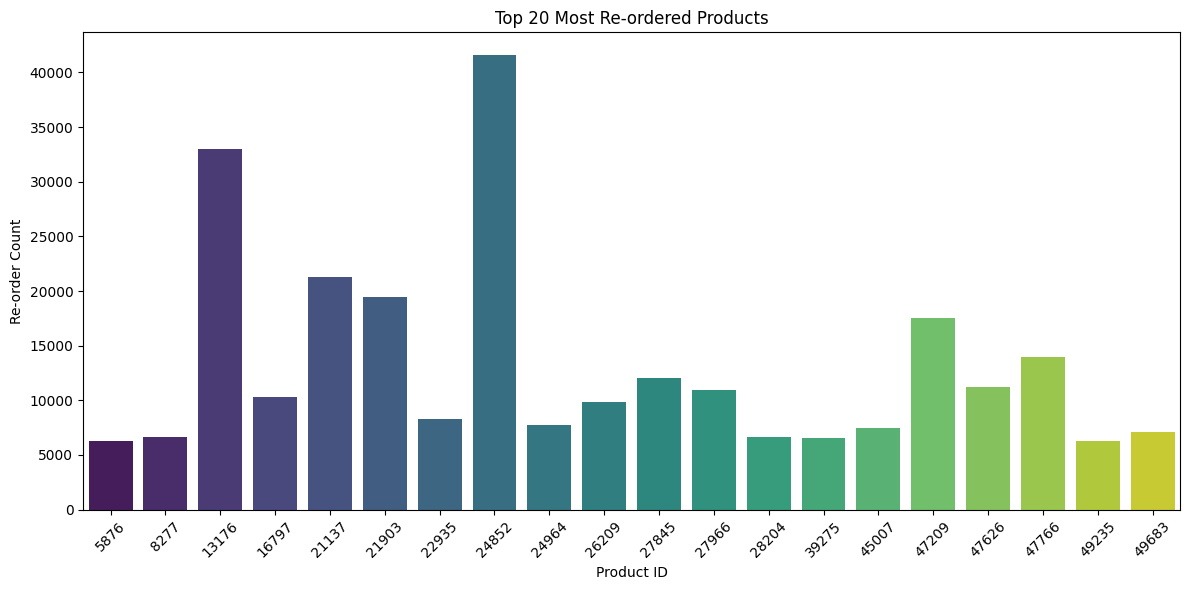

In [52]:
# Query to get the top 20 products with the highest reorder rate
query = """
    SELECT PRODUCT_ID, SUM(REORDERED) AS REORDER_COUNT
    FROM INSTACART_DB.CLEAN.FACT_ORDERS
    GROUP BY PRODUCT_ID
    ORDER BY REORDER_COUNT DESC
    LIMIT 20;
"""

# Execute the query and fetch the results
cur.execute(query)
data = cur.fetchall()

# Convert the results into a DataFrame
df = pd.DataFrame(data, columns=["PRODUCT_ID", "REORDER_COUNT"])

# Plotting the top 20 re-ordered products
plt.figure(figsize=(12, 6))
sns.barplot(x="PRODUCT_ID", y="REORDER_COUNT", data=df, palette="viridis")

# Customize the plot
plt.title("Top 20 Most Re-ordered Products")
plt.xlabel("Product ID")
plt.ylabel("Re-order Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
8. Proporción de pedidos que se vuelven a pedir para cada producto

In [ ]:
# Plotting the reorder proportion by product name
plt.figure(figsize=(12, 6))
sns.barplot(x="PRODUCT_NAME", y="REORDER_PROPORTION", data=df)

# Customize the plot
plt.title("Proportion of Orders Reordered for Each Product")
plt.xlabel("Product Name")
plt.ylabel("Reorder Proportion")
plt.xticks(rotation=45, ha="right")  # Rotate product names for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
9. Proporción de productos pedidos que se vuelven a pedir para cada cliente

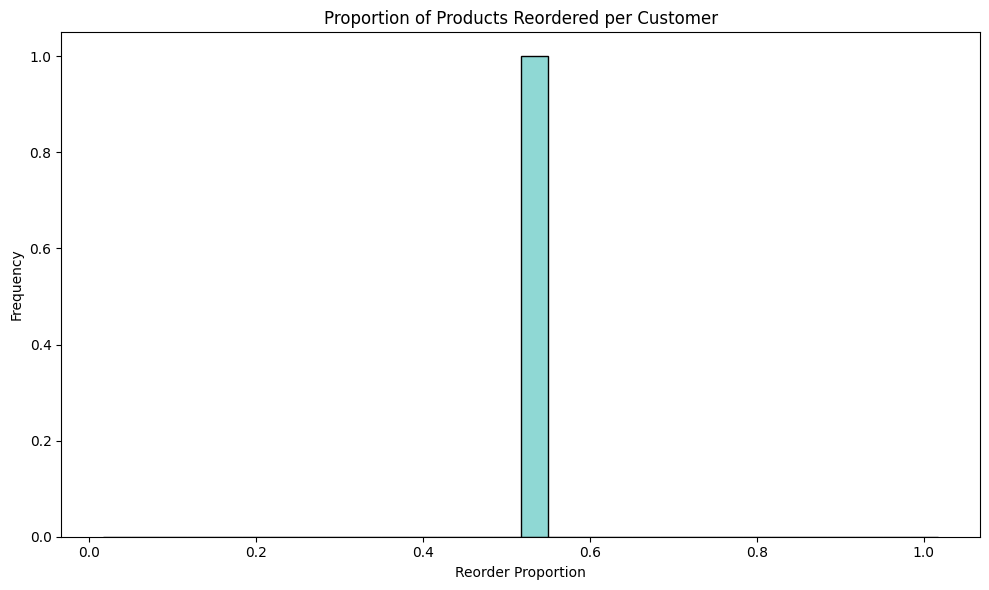

In [54]:
# Query to calculate the reorder proportion for each customer
query = """
    SELECT USER_ID,
           SUM(REORDERED) / COUNT(*) AS REORDER_PROPORTION
    FROM INSTACART_DB.CLEAN.FACT_ORDERS
    GROUP BY USER_ID
    ORDER BY REORDER_PROPORTION DESC;
"""

# Execute the query and fetch the results
cur.execute(query)
data = cur.fetchall()

# Convert the results into a DataFrame
df = pd.DataFrame(data, columns=["USER_ID", "REORDER_PROPORTION"])

# Plotting the reorder proportion for each customer
plt.figure(figsize=(10, 6))
sns.histplot(df['REORDER_PROPORTION'], bins=30, kde=True, color='lightseagreen')

# Customize the plot
plt.title("Proportion of Products Reordered per Customer")
plt.xlabel("Reorder Proportion")
plt.ylabel("Frequency")
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
10. Top 20 artículos que la gente pone primero en el carrito

/tmp/ipykernel_28442/645208473.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PRODUCT_ID", y="FIRST_IN_CART", data=df, palette="viridis")


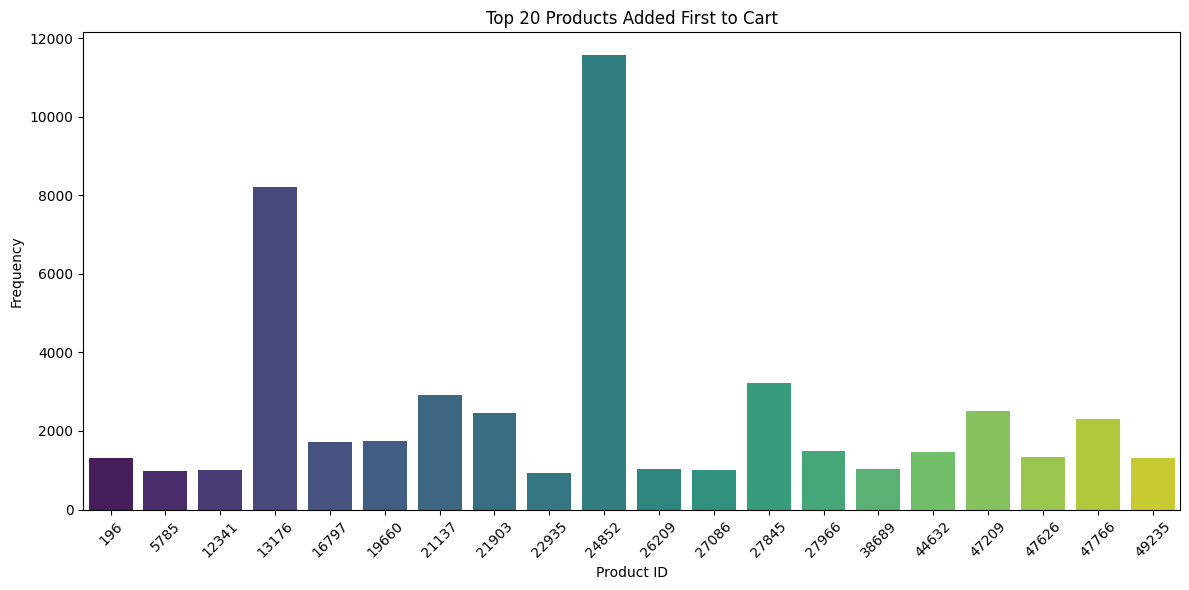

In [55]:
# Query to get the top 20 products added first to the cart
query = """
    SELECT PRODUCT_ID, COUNT(*) AS FIRST_IN_CART
    FROM INSTACART_DB.CLEAN.FACT_ORDERS
    WHERE ADD_TO_CART_ORDER = 1
    GROUP BY PRODUCT_ID
    ORDER BY FIRST_IN_CART DESC
    LIMIT 20;
"""

# Execute the query and fetch the results
cur.execute(query)
data = cur.fetchall()

# Convert the results into a DataFrame
df = pd.DataFrame(data, columns=["PRODUCT_ID", "FIRST_IN_CART"])

# Plotting the top 20 first items added to the cart
plt.figure(figsize=(12, 6))
sns.barplot(x="PRODUCT_ID", y="FIRST_IN_CART", data=df, palette="viridis")

# Customize the plot
plt.title("Top 20 Products Added First to Cart")
plt.xlabel("Product ID")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
